In [15]:
import pandas as pd
import numpy as np

In [16]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
data.drop(['Surname','CustomerId'],axis=1,inplace=True)

## `General overview ------------------------------------------------`

In [18]:
def summary_report_general(data):   
    summary = pd.DataFrame(data.dtypes,columns = ['data_type'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'column_name'})
    ## Identifying the missing values
    summary['missing'] = data.isnull().sum().values
    summary['missing%'] = (data.isnull().sum()/len(data)*100).values
    summary['uniques'] = data.nunique().values
    summary['unique%'] = (data.nunique()/len(data)*100).values
    summary['count'] = (data.count()).values
    return summary

In [19]:
summary_report_general(data)

,column_name,data_type,missing,missing%,uniques,unique%,count
0,RowNumber,int64,0,0.0,10000,100.00,10000
1,CreditScore,int64,0,0.0,460,4.60,10000
2,Geography,object,0,0.0,3,0.03,10000
3,Gender,object,0,0.0,2,0.02,10000
4,Age,int64,0,0.0,70,0.70,10000
5,Tenure,int64,0,0.0,11,0.11,10000
6,Balance,float64,0,0.0,6382,63.82,10000
7,NumOfProducts,int64,0,0.0,4,0.04,10000
8,HasCrCard,int64,0,0.0,2,0.02,10000
9,IsActiveMember,int64,0,0.0,2,0.02,10000


## `Data Type Specific`

In [20]:
cat = []
num = []
for i in data.columns:
    if data[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

In [21]:
data[cat]

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [22]:
data[num]

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,42,2,0.00,1,1,1,101348.88,1
1,2,608,41,1,83807.86,1,0,1,112542.58,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1
3,4,699,39,1,0.00,2,0,0,93826.63,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,39,5,0.00,2,1,0,96270.64,0
9996,9997,516,35,10,57369.61,1,1,1,101699.77,0
9997,9998,709,36,7,0.00,1,0,1,42085.58,1
9998,9999,772,42,3,75075.31,2,1,0,92888.52,1


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# `EDA --------------------------------------------------------`

## `Univariate Analysis`
### Numerical Variable
    boxplot
    Histogram
    distplot
    kdeplot
    displot

### Categorical Variables
    countplot
    pieplot
    
## `Categorical columns`


column name: Geography


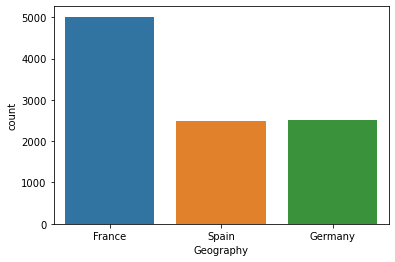

column name: Gender


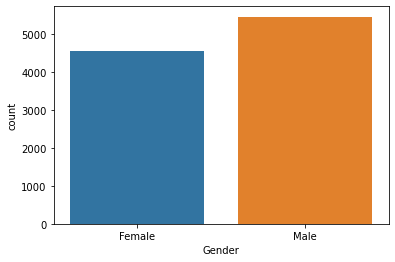

In [24]:
for col in cat:
    print('column name:',col)
    sns.countplot(data[col])
    plt.show()

column name: Geography


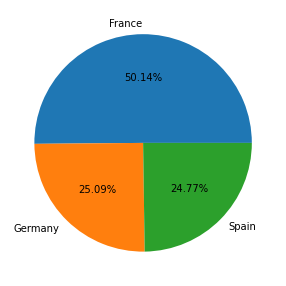

column name: Gender


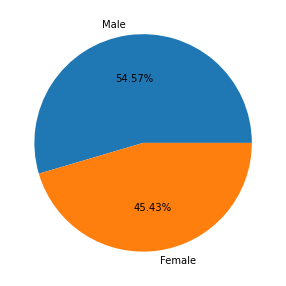

In [25]:
for col in cat:
    plt.figure(figsize=(5,5))
    print('column name:',col)
    plt.pie(data[col].value_counts(),labels=data[col].value_counts().index,autopct = '%.2f%%')
    plt.xticks(rotation = 45)
    plt.show()

## `numerical columns`

column name: RowNumber


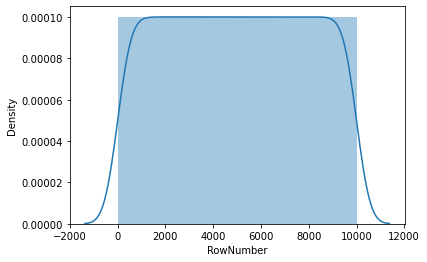

column name: CreditScore


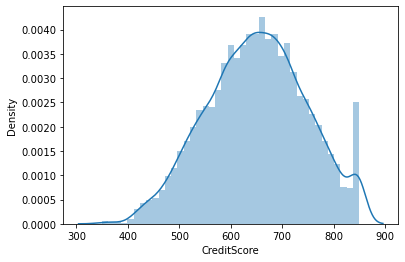

column name: Age


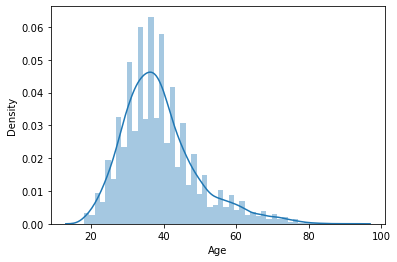

column name: Tenure


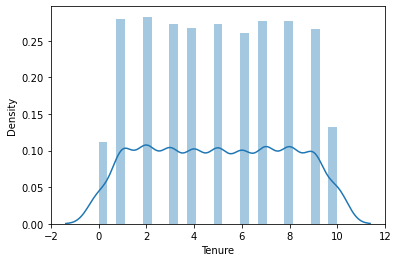

column name: Balance


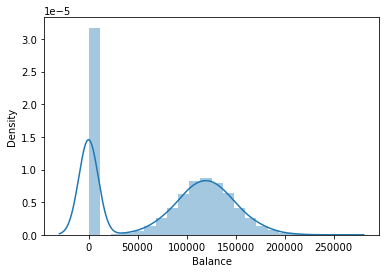

column name: NumOfProducts


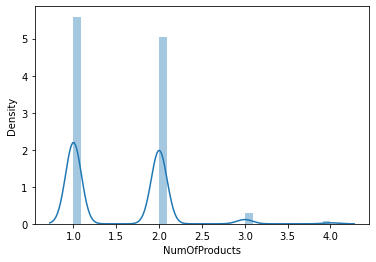

column name: HasCrCard


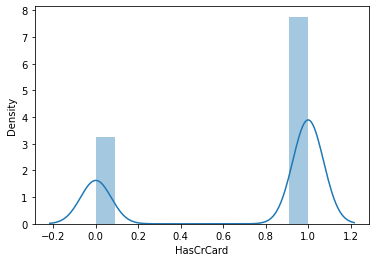

column name: IsActiveMember


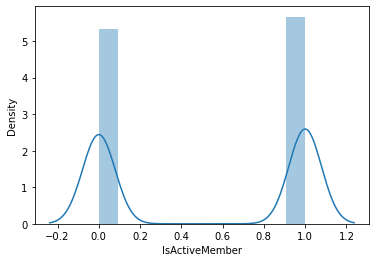

column name: EstimatedSalary


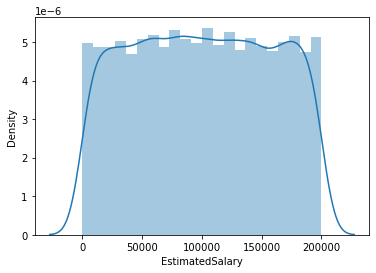

column name: Exited


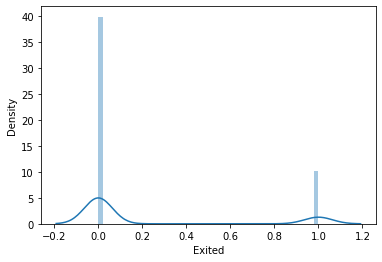

In [26]:
for col in num:
    print('column name:',col)
    sns.distplot(data[col])
    plt.show()

column name: RowNumber


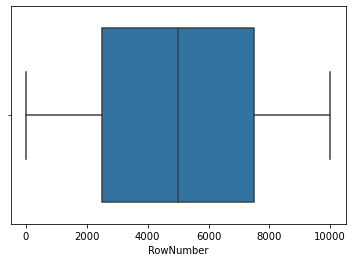

column name: CreditScore


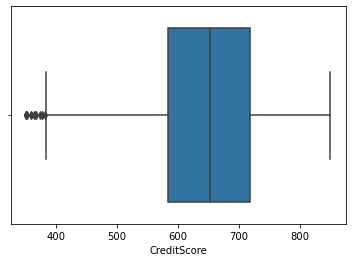

column name: Age


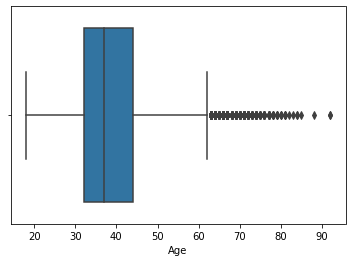

column name: Tenure


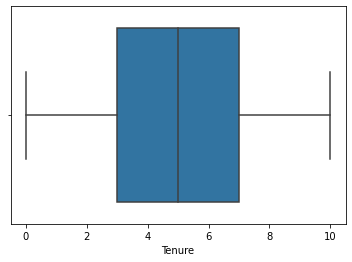

column name: Balance


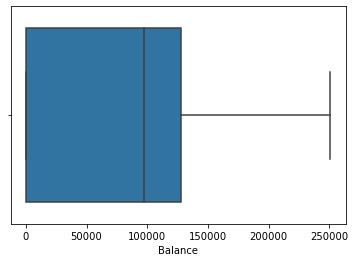

column name: NumOfProducts


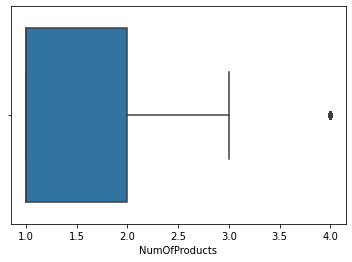

column name: HasCrCard


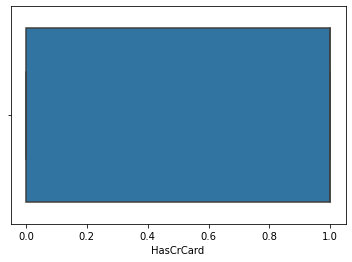

column name: IsActiveMember


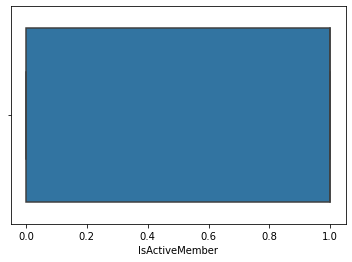

column name: EstimatedSalary


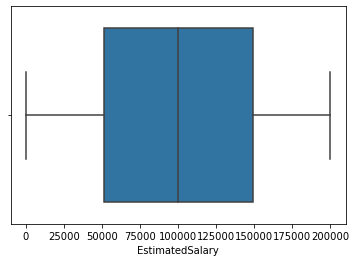

column name: Exited


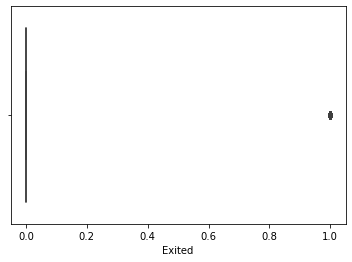

In [27]:
for col in num:
    print('column name:',col)
    sns.boxplot(data[col])
    plt.show()

column name: RowNumber


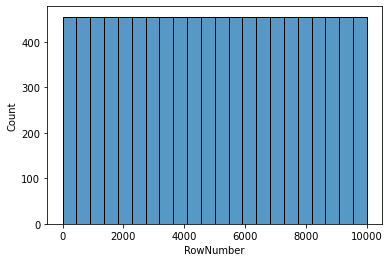

column name: CreditScore


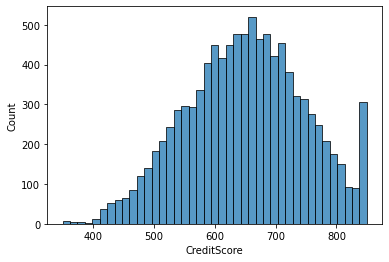

column name: Age


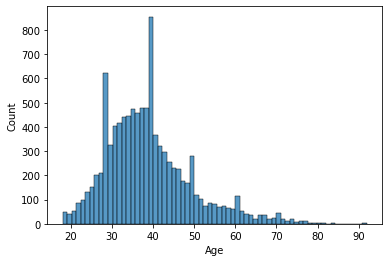

column name: Tenure


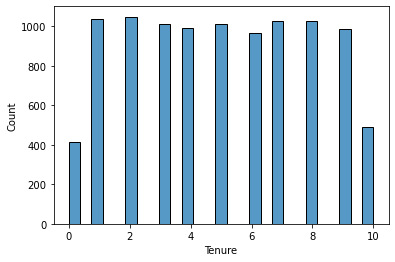

column name: Balance


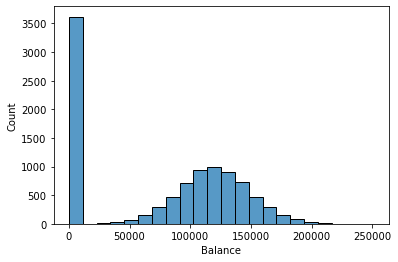

column name: NumOfProducts


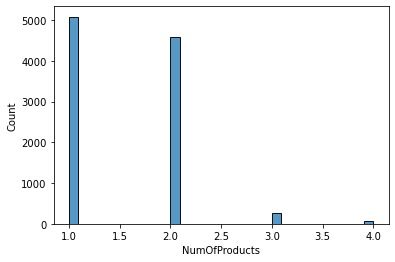

column name: HasCrCard


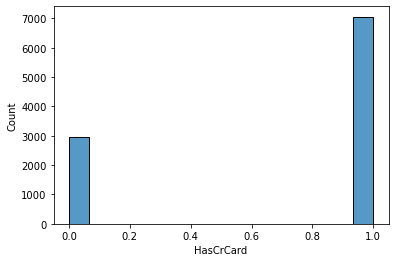

column name: IsActiveMember


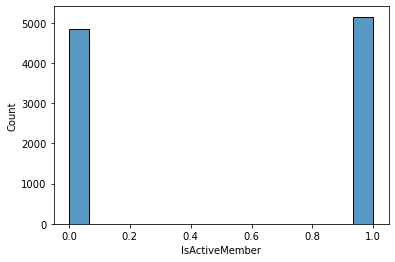

column name: EstimatedSalary


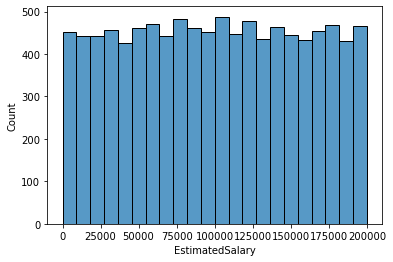

column name: Exited


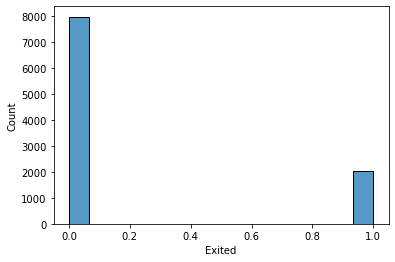

In [28]:
for col in num:
    print('column name:',col)
    sns.histplot(data[col])
    plt.show()

## `Interactive features`

In [29]:
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [30]:
data1 = data.copy()

In [31]:
list(data1.select_dtypes('number').columns)

['RowNumber',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [32]:
@interact
def create_corr(col = list(data.select_dtypes('number').columns),
               col1 = list(data.select_dtypes('number').columns)):
    print('correlation',data[col].corr(data[col1]))

interactive(children=(Dropdown(description='col', options=('RowNumber', 'CreditScore', 'Age', 'Tenure', 'Balan…

In [33]:
@interact
def create_groupby(col = list(data.select_dtypes('object').columns),
               col1 = list(data.select_dtypes('number').columns)):
    print(data.groupby(col)[col1].agg({'min','max','mean','median'}))

interactive(children=(Dropdown(description='col', options=('Geography', 'Gender'), value='Geography'), Dropdow…

In [35]:
@interact_manual
def create_bar(col = list(data.select_dtypes('object').columns),
               col1 = list(data.select_dtypes('number').columns)):
    sns.barplot(data[col],data[col1],hue = data['Exited'])
    plt.show()

interactive(children=(Dropdown(description='col', options=('Geography', 'Gender'), value='Geography'), Dropdow…

In [37]:
@interact_manual
def create_box(col = list(data.select_dtypes('object').columns),
               col1 = list(data.select_dtypes('number').columns)):
    sns.boxplot(data[col],data[col1],hue = data['Exited'])
    plt.show()

interactive(children=(Dropdown(description='col', options=('Geography', 'Gender'), value='Geography'), Dropdow…

## `Bivariate Analysis`
### Numerical Variable and categorical variable
    - boxplot
    - barplot
    - voilinplot
    - scatterplot
    - lineplot

### Numerical variable and Nmerical variable
    - scatterplot
    - relplot
    - regplot
    - jointplot

### categorical variable and categoriacal variables
    - crosstab then do barplot

In [38]:
@interact
def create_crosstab(col = list(data.select_dtypes('object').columns),
               col1 = list(data.select_dtypes('object').columns)):
    print(pd.crosstab(data[col],data[col1]))

interactive(children=(Dropdown(description='col', options=('Geography', 'Gender'), value='Geography'), Dropdow…

In [39]:
@interact_manual
def create_crosstab(col = list(data.select_dtypes('object').columns),
               col1 = list(data.select_dtypes('object').columns)):
    pd.crosstab(data[col1],data[col]).plot.bar()

interactive(children=(Dropdown(description='col', options=('Geography', 'Gender'), value='Geography'), Dropdow…

In [40]:
@interact_manual
def create_box(col = list(data.select_dtypes('number').columns),
               col1 = list(data.select_dtypes('number').columns)):
    sns.jointplot(data[col],data[col1],hue = data['Exited'])
    plt.show()

interactive(children=(Dropdown(description='col', options=('RowNumber', 'CreditScore', 'Age', 'Tenure', 'Balan…

## `END -------------------------------------------------------`